In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def read_data(url):
    df = pd.read_csv(url)
    df = df.loc[df[" utilization.gpu [%]"] > 0]
    #print(df.columns)
    return df

In [3]:
def time_duration(df):
    df.timestamp = [datetime.strptime(time, "%Y/%m/%d %H:%M:%S.%f") for time in df.timestamp]
    time_interval = df.iloc[-1].timestamp - df.iloc[0].timestamp
    print("Total time in seconds: {}".format(time_interval.total_seconds()))
    return time_interval.total_seconds()

In [4]:
def power_reading(url):
    df = read_data(url)
    time_interval = time_duration(df)
    mean_power =df[' power.draw [W]'].mean()
    total_power = mean_power * time_interval
    print ("Mean Power consumption (Watt): {}".format(mean_power))
    print("Total Power consumption (Watt second): {}".format(total_power))
    return df, time_interval, mean_power, total_power

In [5]:
url = 'nvidia/nvidia_power_cola_32.csv'
df, time_interval, mean_power, total_power = power_reading(url)

Total time in seconds: 175.41
Mean Power consumption (Watt): 195.89942857142861
Total Power consumption (Watt second): 34362.71876571429


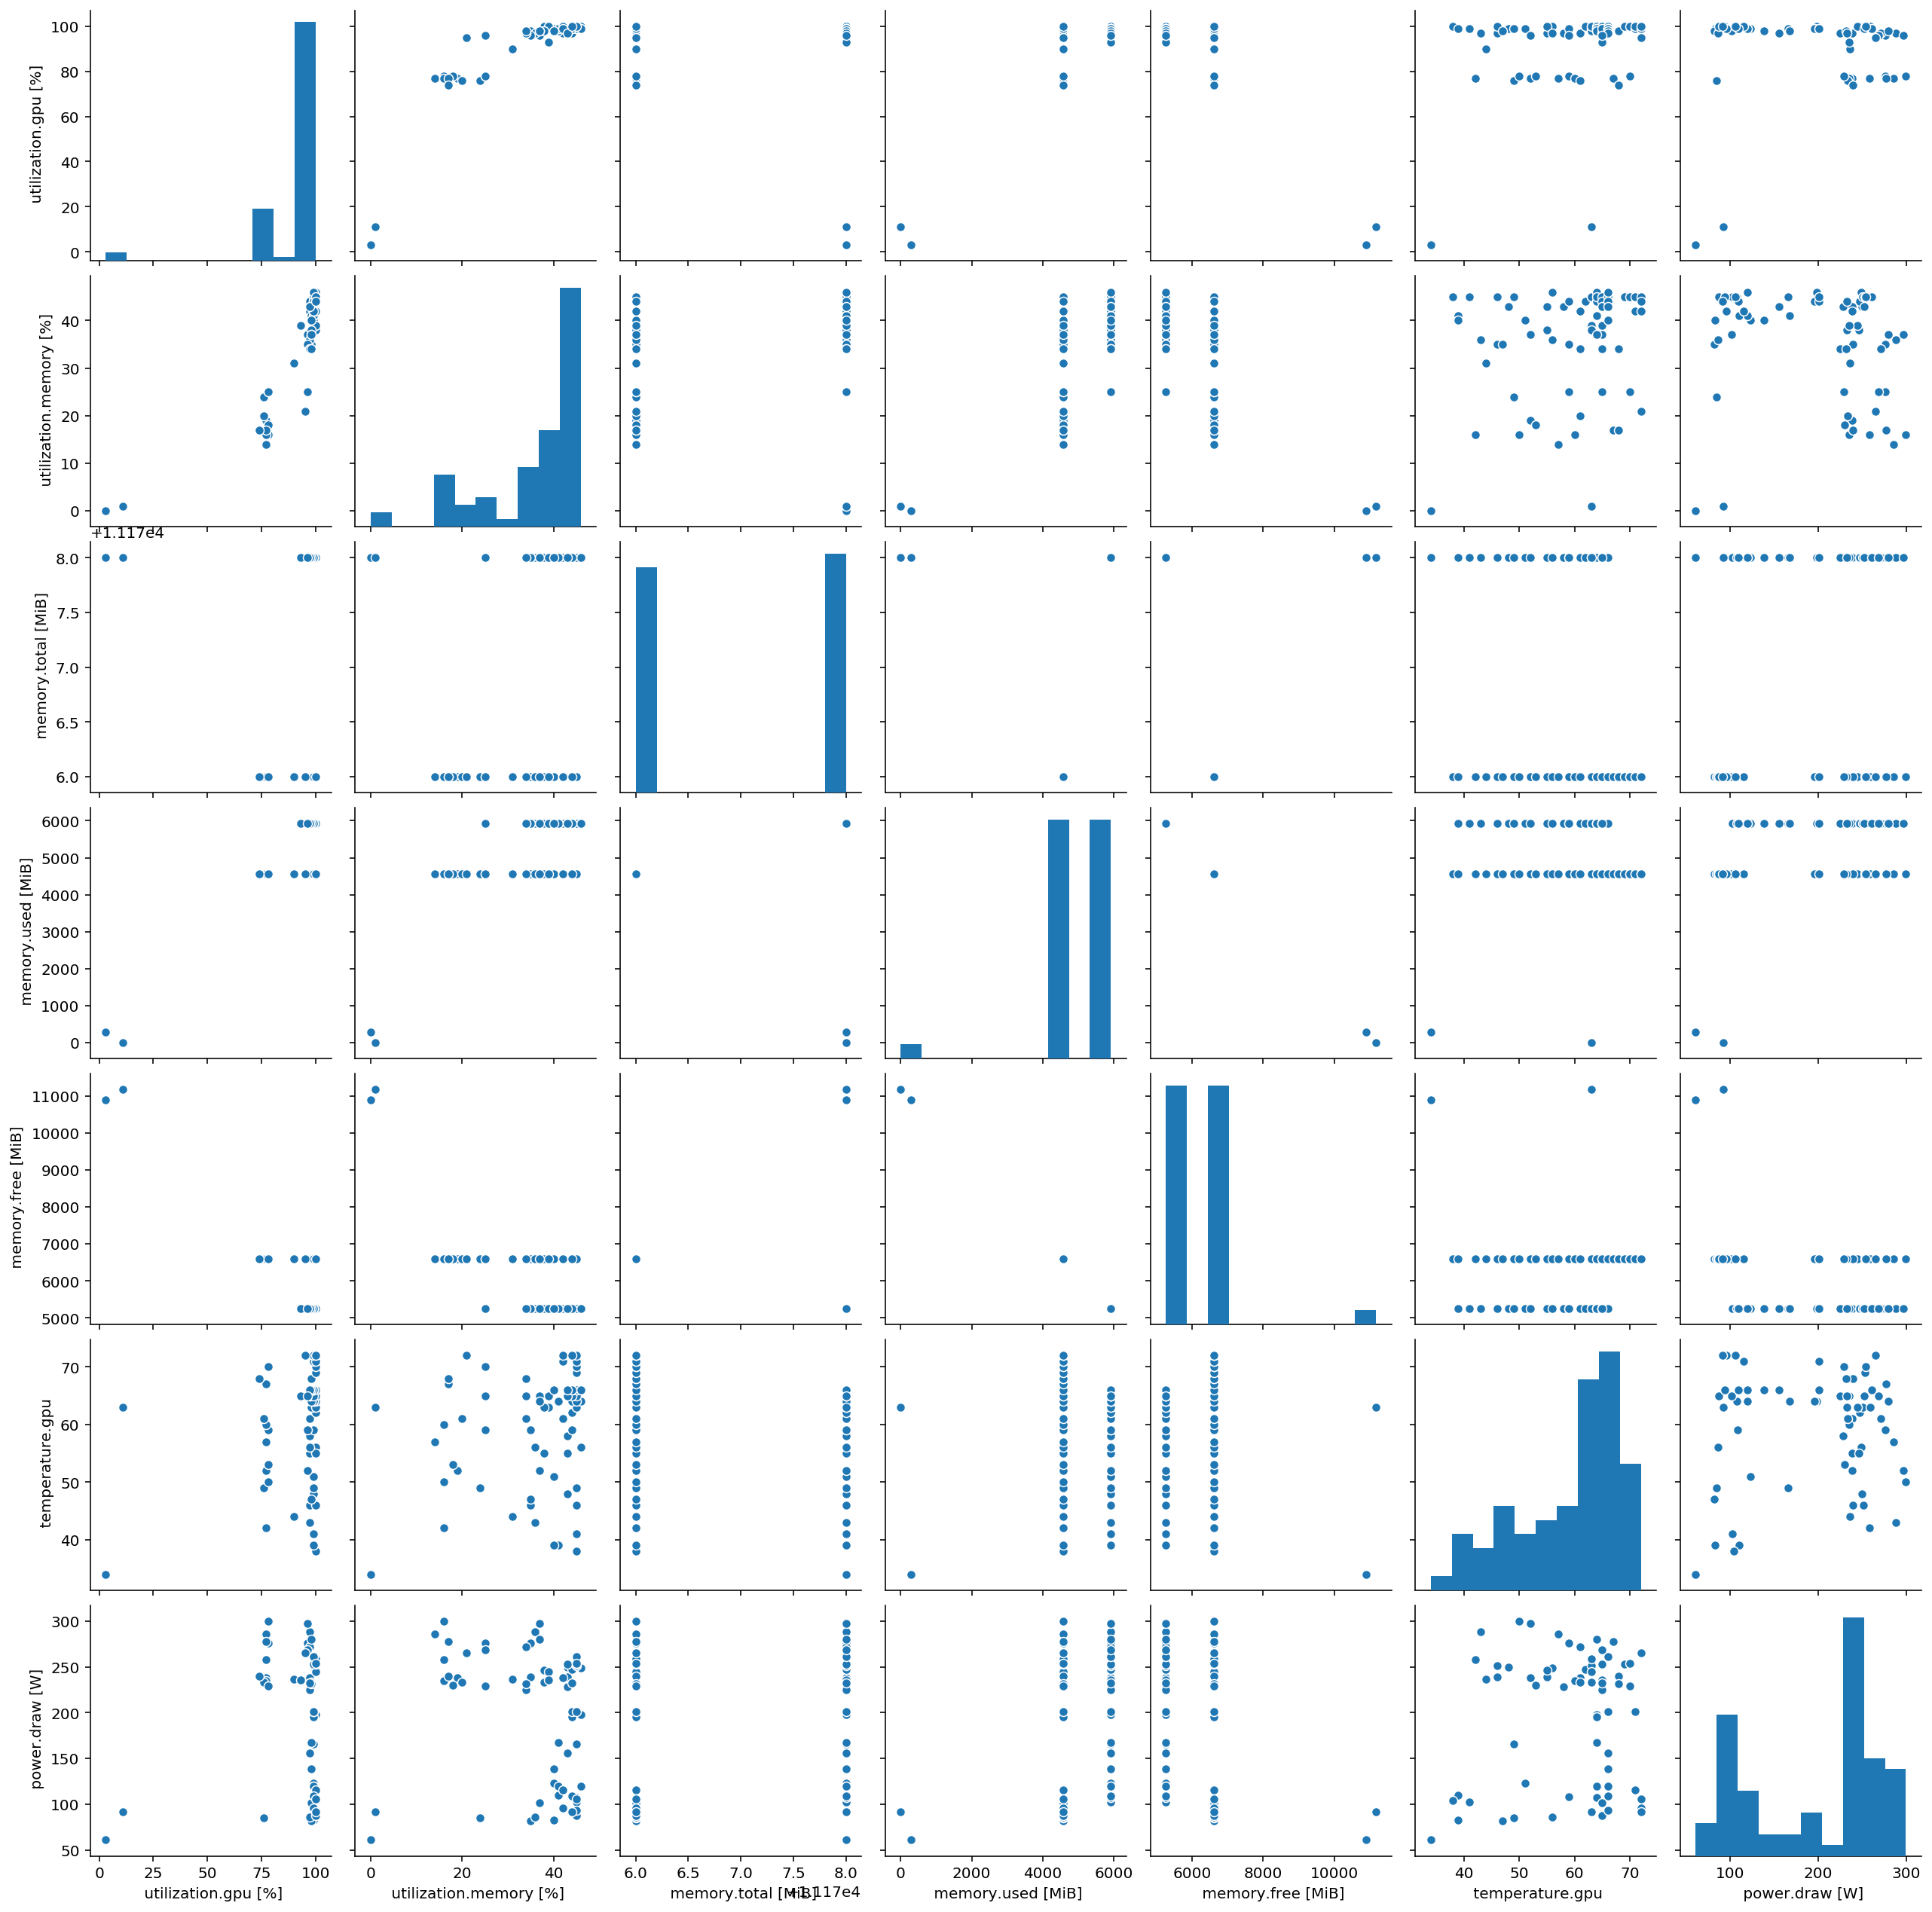

In [7]:
sns.pairplot(df)

In [12]:
url = 'nvidia/nvidia_power_cola_64.csv'
df, time_interval, mean_power, total_power = power_reading(url)

Total time in seconds: 140.336
Mean Power consumption (Watt): 223.95206896551724
Total Power consumption (Watt second): 31428.53755034483


In [13]:
url = 'nvidia/nvidia_power_mrpc_32.csv'
df, time_interval, mean_power, total_power = power_reading(url)

Total time in seconds: 75.197
Mean Power consumption (Watt): 214.65281250000004
Total Power consumption (Watt second): 16141.247541562503
